# Binning, Discretization, Linear Models, and Trees

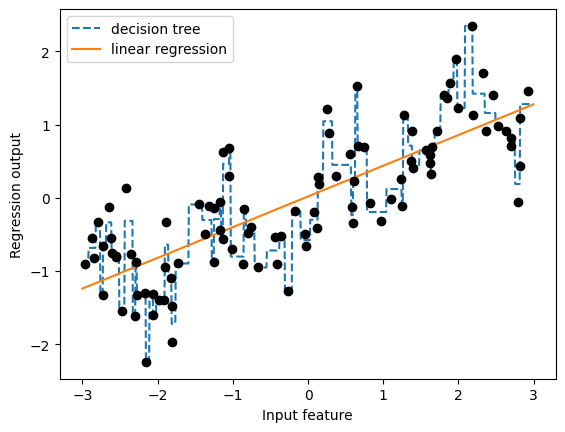

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree", linestyle="--")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


In [2]:
#For linear models a good way to make more powerful on continuous data is to use binning on the data
bins = np.linspace(-3, 3, 11)
print(f"bins: {bins}")
#transform the single continuous input feature in the wave dataset into a categorical feature that encodes which bin a data point is in.
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [3]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder()
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])
print(f"X_binned.shape: {X_binned.shape}")

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (5, 10)>
  Coords	Values
  (0, 3)	1.0
  (1, 9)	1.0
  (2, 7)	1.0
  (3, 5)	1.0
  (4, 1)	1.0
X_binned.shape: (100, 10)


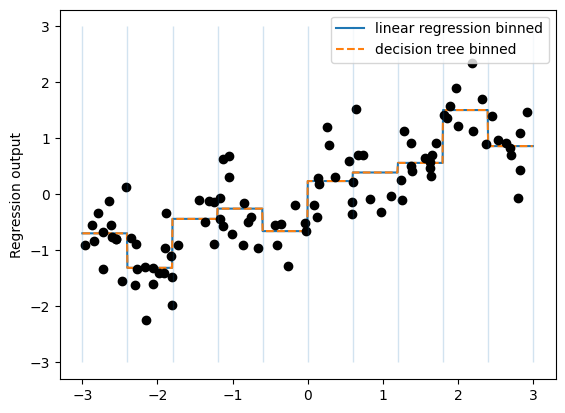

In [5]:
## Now we can fit a linear regression model to the binned data
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
#plot regression line for decision tree dashed
plt.plot(line, reg.predict(line_binned), label='decision tree binned', linestyle='--')
plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")

X, y = mglearn.datasets.make_wave(n_samples=100)

**Binning features generally has no ben‐eficial effect for tree-based models**

# 

## Interactions and Polynomials
Another way to enrich a feature representation, particularly for linear models, isadding interaction features and polynomial features of the original data.

In [6]:
#Fixed issue with the line below
#One way to add a slope to the linear model on the binned data is to add the original feature (the x-axis in the plot) back in
X_binned_dense = X_binned.toarray()
X_combined = np.hstack([X, X_binned_dense])
print(X_combined.shape)


(100, 11)


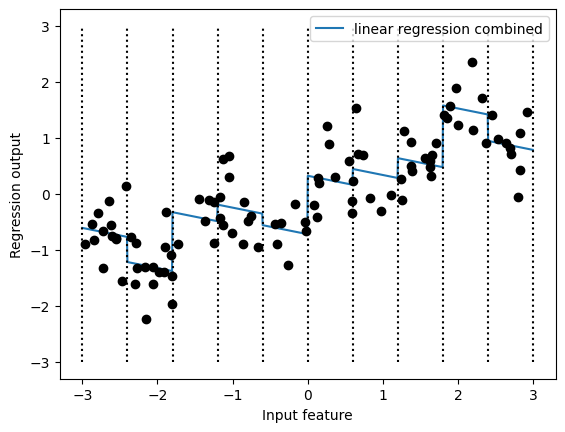

In [7]:
#Plots linear regression using binned features and a single global slope
reg = LinearRegression().fit(X_combined, y)
line_binned = encoder.transform(np.digitize(line, bins=bins)).toarray()
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

**In the example above the slope is shared by each bin**, the goal now is to have a slope for each bin. To do this lets add an interaction or product feature that indicates which bin a data point is in and where it lies on the x-axis

In [8]:
X_product = np.hstack([X_binned_dense, X * X_binned_dense])
print(X_product.shape)

(100, 20)


The dataset now has 20 features: the indicators for which bin a data point is in, and a product of the original feature and the bin indicator.

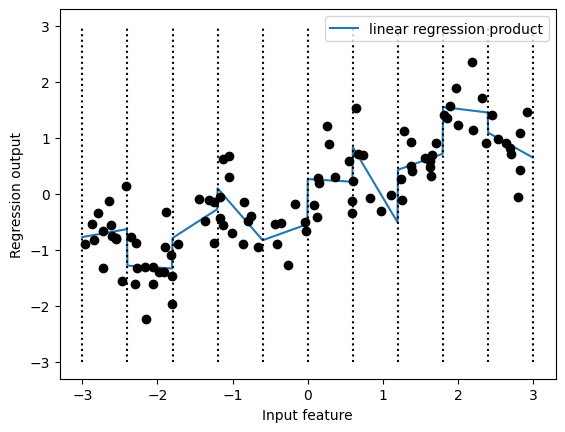

In [9]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [10]:
#Now we will use polynomial features to add non-linearity to the linear model
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print(f"X_poly.shape: {X_poly.shape}")
print(f"Entries of X:\n{X[:5]}")
print(f"Entries of X_poly:\n{X_poly[:5]}")

X_poly.shape: (100, 10)
Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


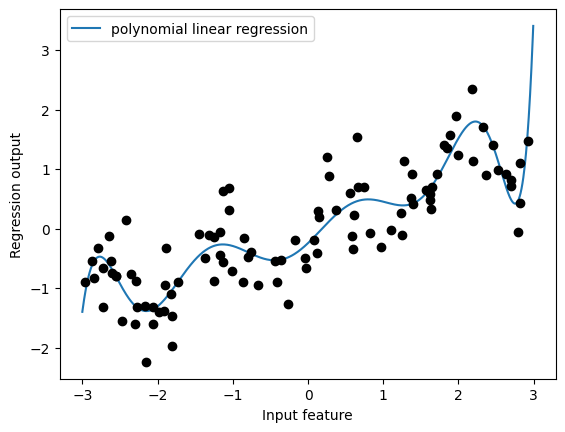

In [11]:
#Now we can fit a linear regression model to the polynomial features
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Polynomial features yield a very smooth fit on this one-dimensional data. However, polynomials of high degree tend to behave in extreme ways on the boundaries or in regions with little data.
<br>**Comparing the results with the kernel SVM:**

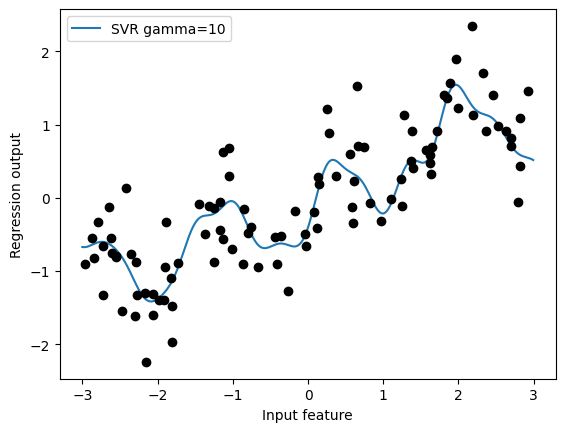

In [12]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")